Digite os meses que deseja analisar (separados por vírgula, em maiúsculas): jun,jul
JUN,JUL
Gerado na pasta: ../modulo 14/output/figs/2019-06/
Gerado na pasta: ../modulo 14/output/figs/2019-07/


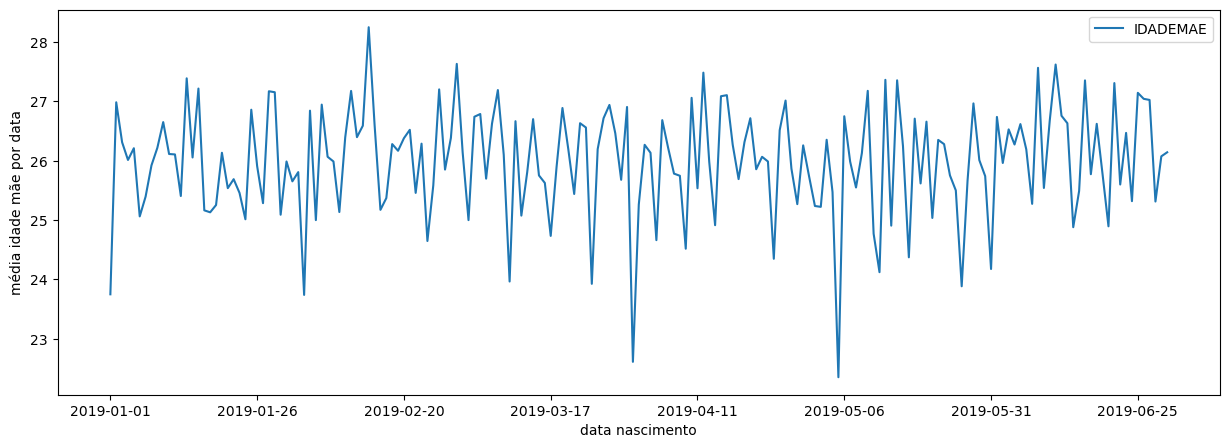

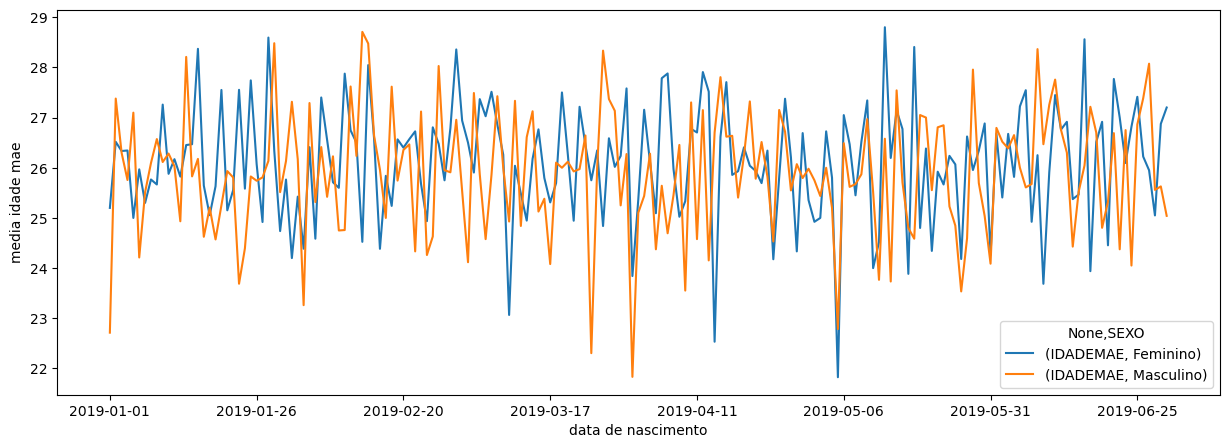

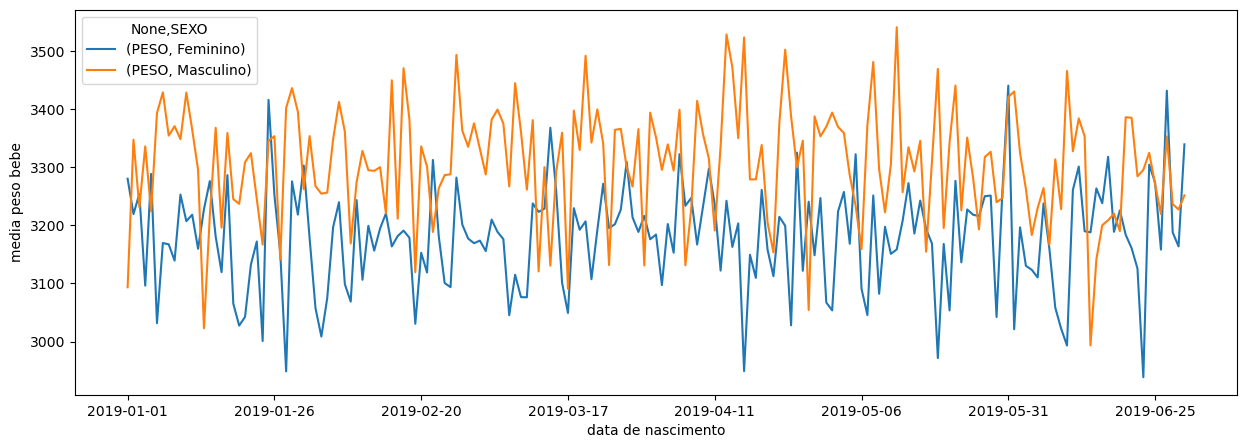

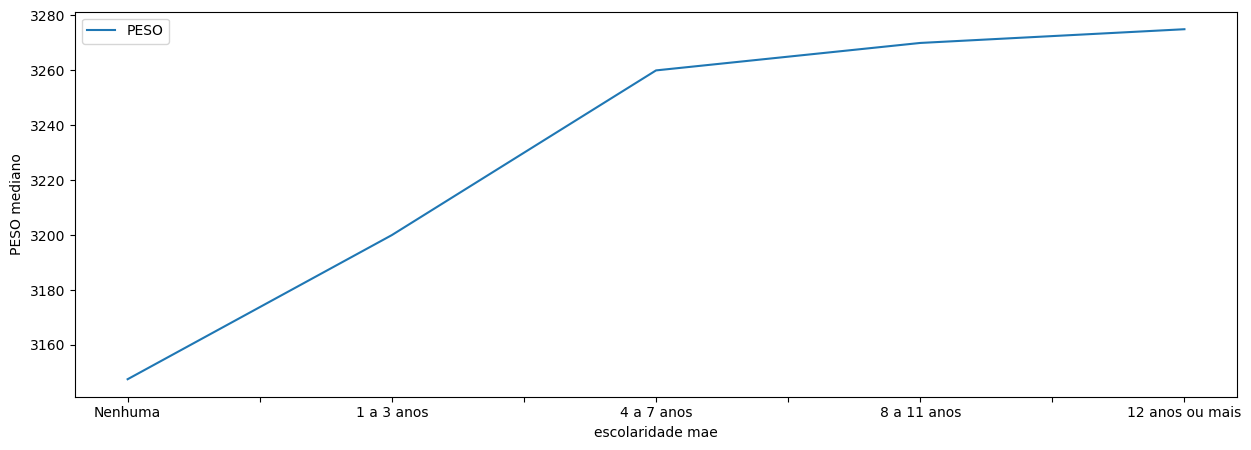

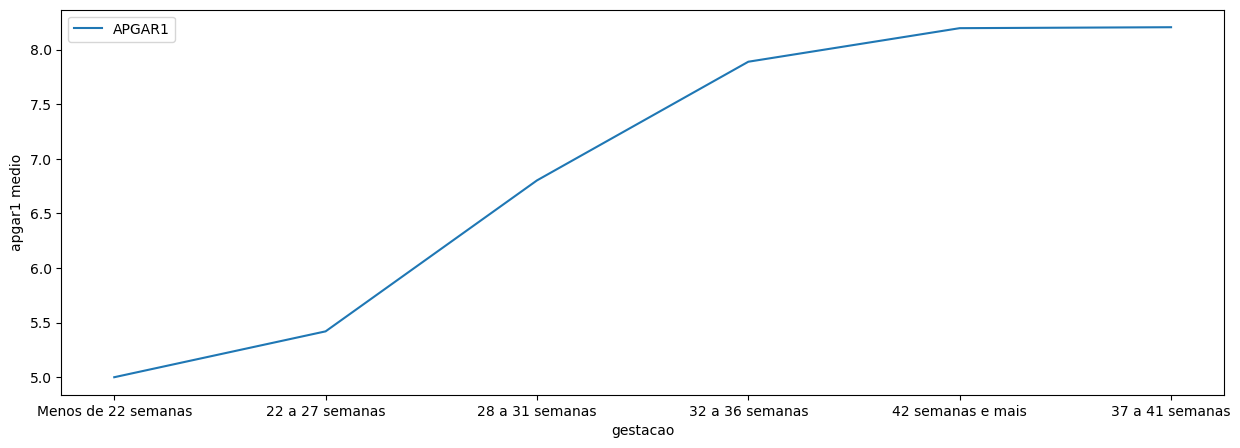

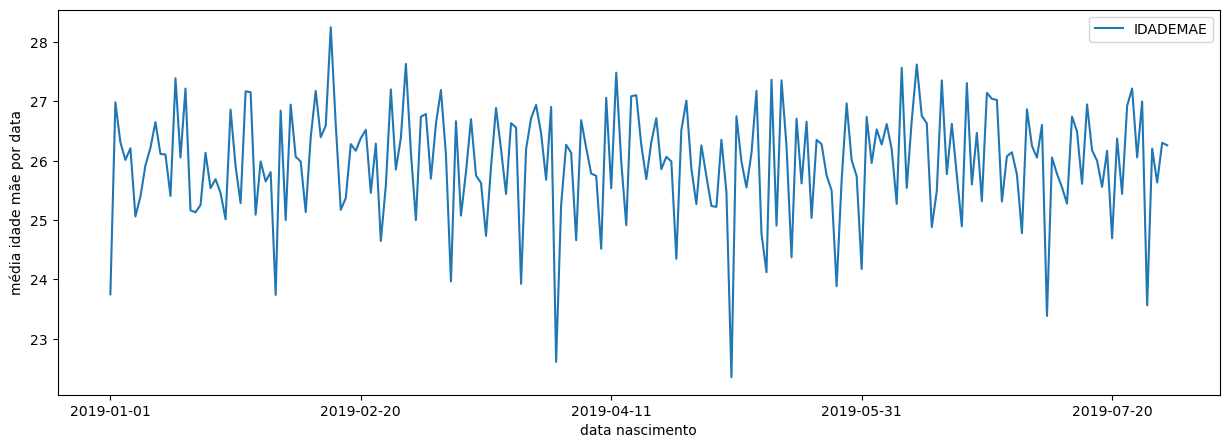

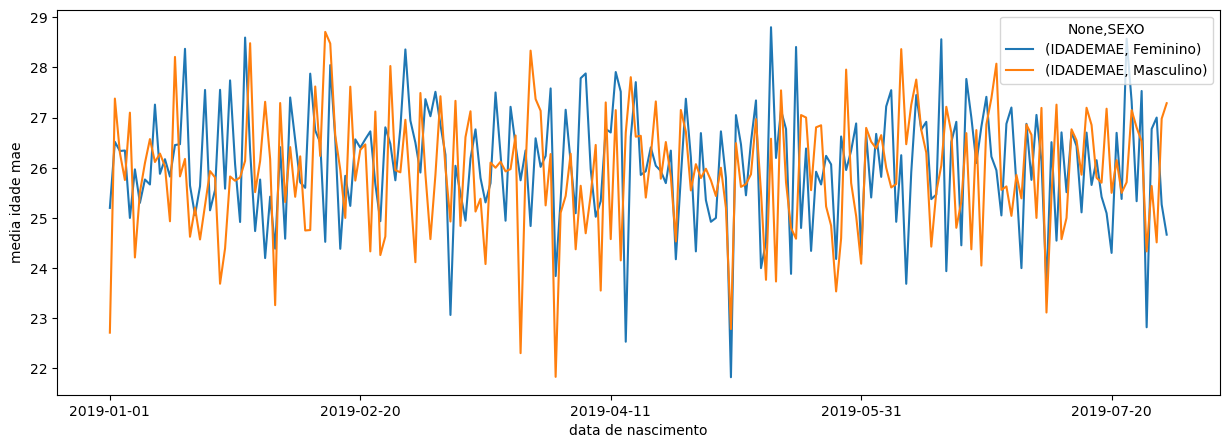

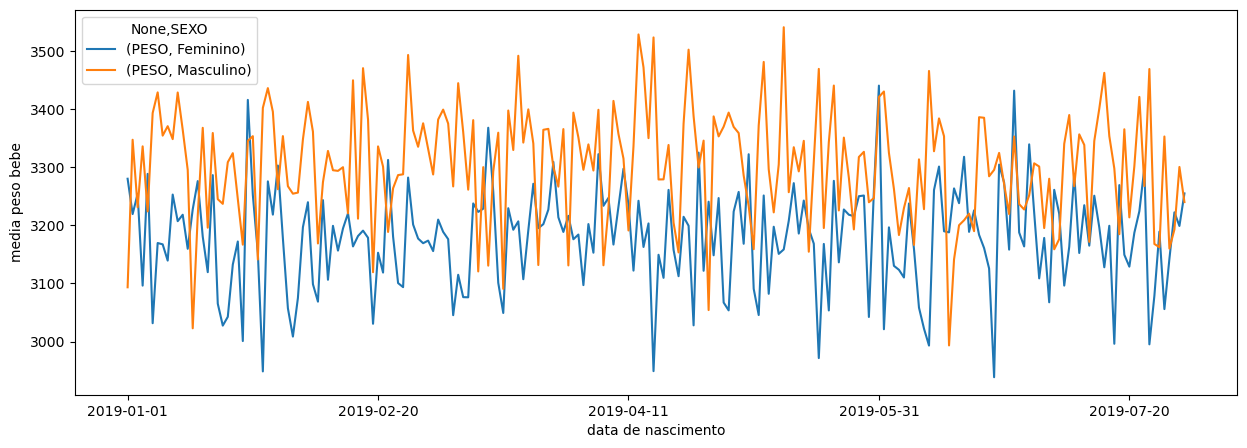

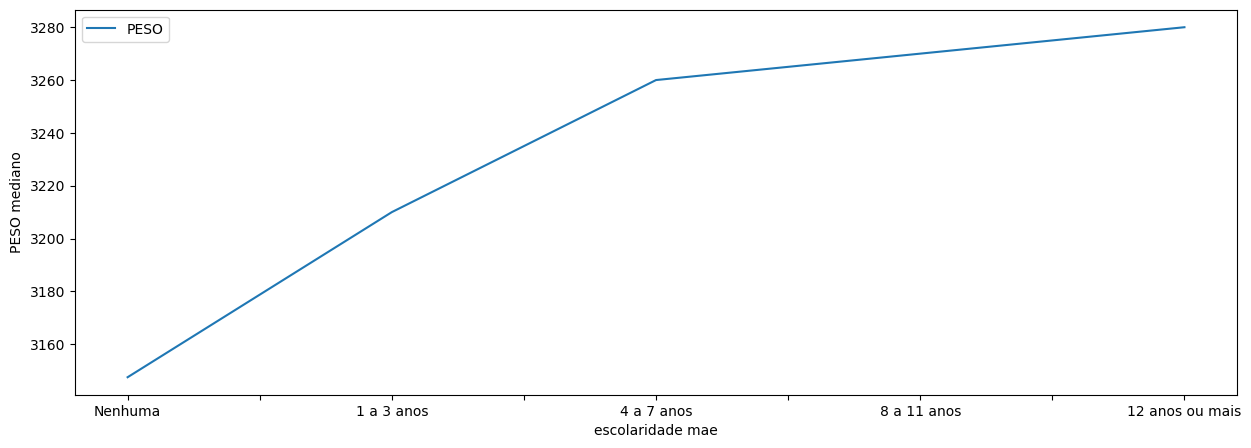

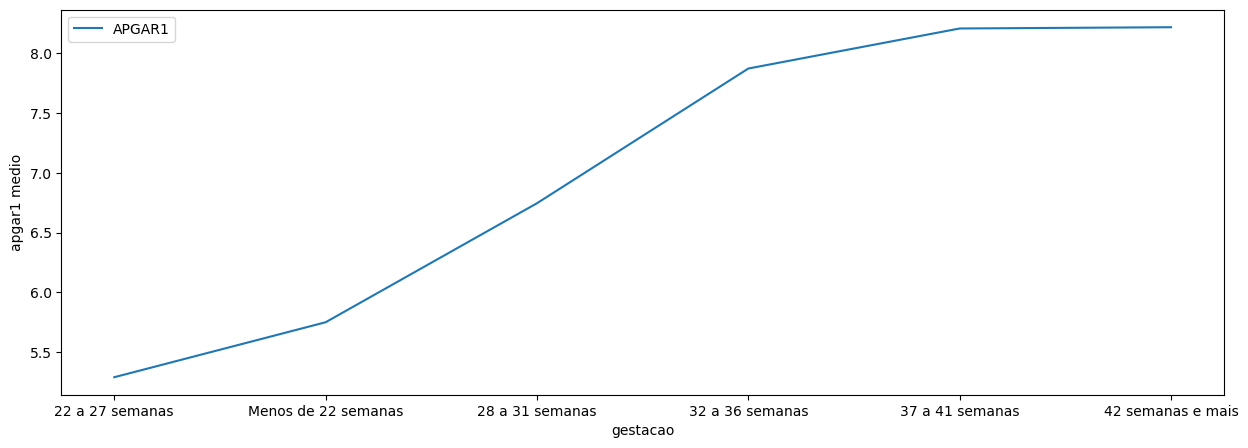

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada',arquivo = 'nada', folder = 'nada'):
    if opcao == 'nada': # Cria o grafico de linha sem agregações
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':  # Cria o grafico de linha por uma variavel específica
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack': # Cria o grafico de linha separando o eixo y em variaveis epsecíficas
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if (pasta != 'nada'):
        plt.savefig(folder + arquivo + '.png')
    return None

lista_meses = input("Digite os meses que deseja analisar (separados por vírgula, em maiúsculas): ").upper()


meses_validos = ["MAR", "ABR", "MAI", "JUN", "JUL", "AGO", "SET", "OUT", "NOV", "DEZ"]

lista_meses_valida = []  # Lista para armazenar os meses válidos
for mes in lista_meses.split(","):
  mes = mes.strip()  # Remove espaços em branco
  if mes in meses_validos:
    lista_meses_valida.append(mes)

if not lista_meses_valida:
  print("Nenhum mês válido foi informado. Saindo do programa.")
  exit()
print(lista_meses)
    
#lista de listas de opções dos graficos que serão gerados para cada interação, pode mudar para gerar mais graficos ou graficos diferentes.
opcoes = [['IDADEMAE', 'DTNASC', 'mean', 'média idade mãe por data', 'data nascimento', 'nada' , 'media idade mae por data'],
    ['IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack', 'media idade mae por sexo'],
    ['PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack', 'media peso bebe por sexo'],
    ['PESO', 'ESCMAE', 'median', 'PESO mediano','escolaridade mae','sort', 'mediano por escolaridade mae'],
    ['APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort', 'media apgar1 por gestacao']
          ]
#pastas de destino
pasta_input = '../modulo 14/input/'
pasta_out = '../modulo 14/output/figs/'

#este loop irá interagir entre cada arquivo de imput com base no que o usuario colocou e criar od DFs para analise

for m in lista_meses_valida:
    arquivo = 'SINASC_RO_2019_' + m + '.csv'
    sinasc = pd.read_csv(pasta_input + arquivo)
    #nomear e criar a pasta de de destino
    max_data = sinasc.DTNASC.max()[:7]
    pasta = pasta_out + max_data + '/'
    os.makedirs(pasta_out+max_data+ '/', exist_ok=True)
#loop dentro do loop para interagir em cada lista dentro da lista de opcoes para gerar cada grafico.
    for opcao in opcoes:
        plota_pivot_table(sinasc, opcao[0], opcao[1], opcao[2], opcao[3], opcao[4], opcao[5], opcao[6],pasta)    
    
    print(f'Gerado na pasta: {pasta}')